# Datasets Compil

This notebook is to make sure anyone can produce the **exactly** same dataset used in the paper

Please see http://astronn.readthedocs.io/en/latest/quick_start.html#folder-structure-for-astronn-apogee-and-gaia-data
to setup the enviroment such that astroNN can download SDSS APOGEE data to your computer and compile the dataset

In [1]:
from astroNN.datasets import H5Compiler
from astroNN.apogee import allstar
from astropy.io import fits
import numpy as np

# To create a astroNN compiler instance
compiler = H5Compiler()
compiler.teff_low = 4000  # Effective Temperature Upper
compiler.teff_high = 5500  # Effective Temperature Lower
compiler.vscattercut = 1  # Velocity Scattering Upper
compiler.starflagcut = True  # STARFLAG == 0
compiler.aspcapflagcut = True  # ASPCAPFALG == 0
compiler.ironlow = -10000.  # [Fe/H] Lower
compiler.SNR_low = 200  # SNR Lower
compiler.SNR_high = 99999  # SNR Upper

# allstar file
hdulist = fits.open(allstar(dr=14))

# idx refers to the indices in allstar(dr=14)
idx = compiler.filter_apogeeid_list(hdulist)

compiler.filename = '__train'

# To compile a .h5 datasets, use .compile() method
compiler.compile()

C:\Users\Henry\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
Total Combined Spectra after filtering:  33407
Total Individual Visit Spectra there:  98596
dr is not provided, using default dr=14
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
Loading allStar DR14 catalog
Total Combined Spectra after filtering:  33407
Total Individual Visit Spectra there:  98596
Completed 1 of 33407, 0.25s elapsed
Completed 101 of 33407, 2.09s elapsed
Completed 201 of 33407, 3.91s elapsed
Completed 301 of 33407, 5.80s elapsed
Completed 401 of 33407, 7.84s elapsed
Completed 501 of 33407, 9.86s elapsed
Completed 601 of 33407, 11.88s elapsed
Completed 701 of 33407, 13.92s elapsed
Completed 801 of 33407, 15.95s elapsed
Completed 901 of 33407, 17.98s elapsed
Completed 1001 of 33407, 20.01s elapsed
Completed 1101 of 33407, 22.06s elapsed
Completed 1201 of 33407, 24.05s elapsed
Completed 1301 of 33407, 25.95s elapsed
Completed 1401 of 3

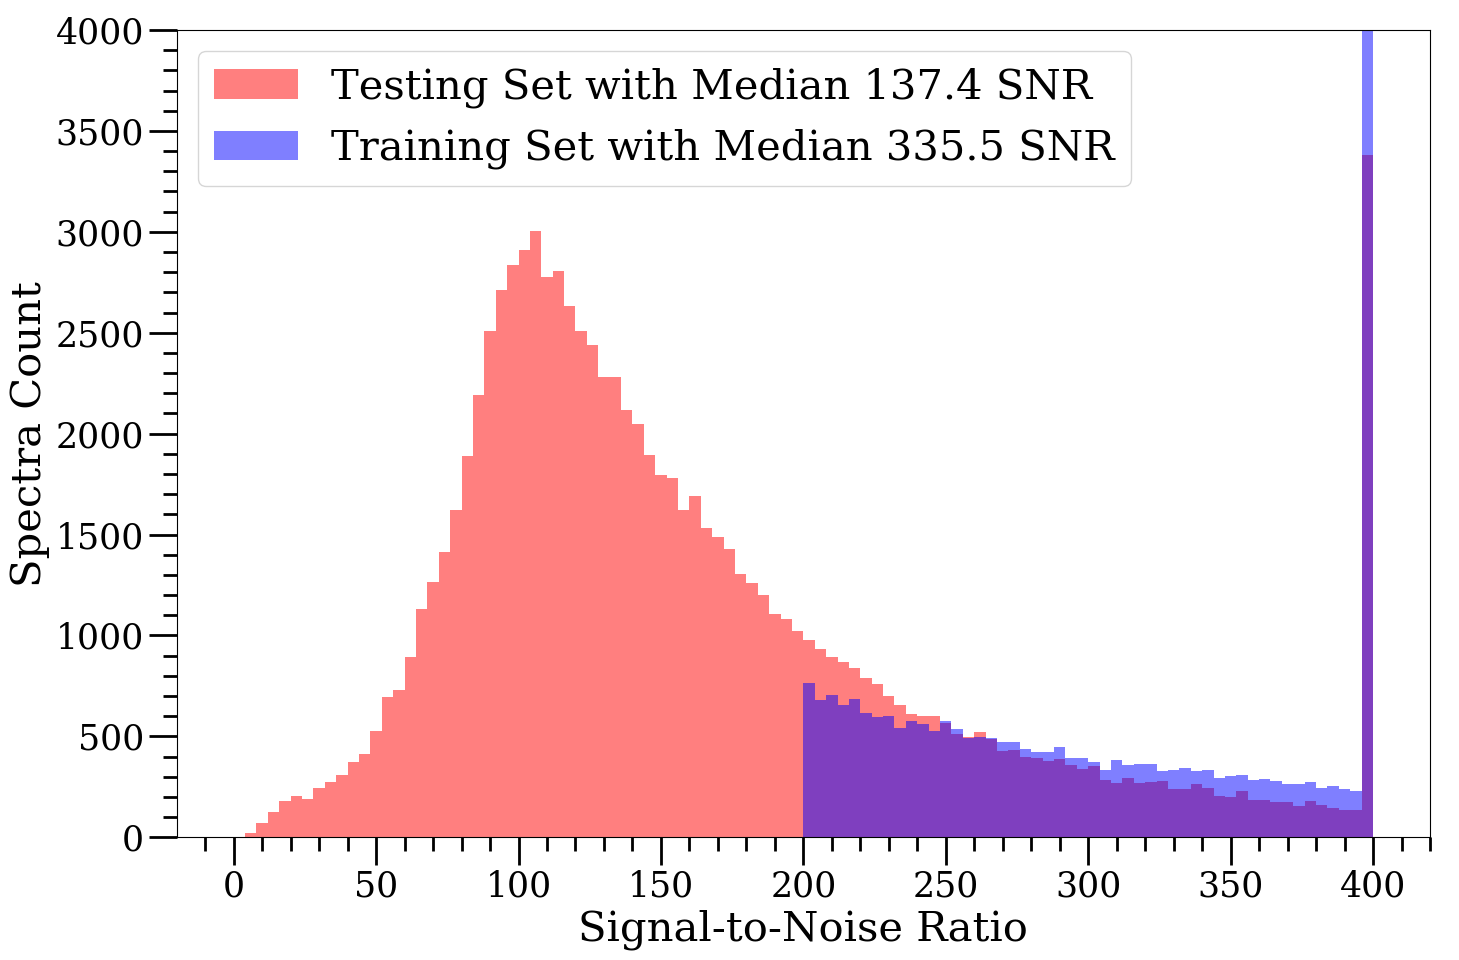

In [5]:
from astroNN.datasets import H5Loader
import pylab as plt
import numpy as np

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})
loader = H5Loader('__train')
loader.load_err = False
loader.load_combined = True  # load combined spectra
SNR_train = loader.load_entry('SNR')

loader2 = H5Loader('__train')
loader2.load_err = False
loader2.load_combined = False
SNR_test = loader2.load_entry('SNR')

upper_bound = 400

SNR_test_plot = np.array(SNR_test)
SNR_train_plot = np.array(SNR_train)
SNR_test_plot[(SNR_test>upper_bound)] = upper_bound
SNR_train_plot[(SNR_train>upper_bound)] = upper_bound

plt.figure(figsize=(15,10), dpi=100)
plt.hist(SNR_test_plot, 100, range=(0, 400), facecolor='red', alpha=0.5, label=f'Testing Set with Median {np.median(SNR_test):.{1}f} SNR')
plt.hist(SNR_train_plot, 50, range=(200, 400), facecolor='blue', alpha=0.5, label=f'Training Set with Median {np.median(SNR_train):.{1}f} SNR')
plt.xlabel('Signal-to-Noise Ratio', fontsize=30)
plt.ylabel('Spectra Count', fontsize=30)
plt.ylim((0, 4000))
plt.legend(loc='best', fontsize=30)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
plt.tight_layout()
plt.savefig('SNR.png')
plt.show()

995  of the log(g) are -9999.


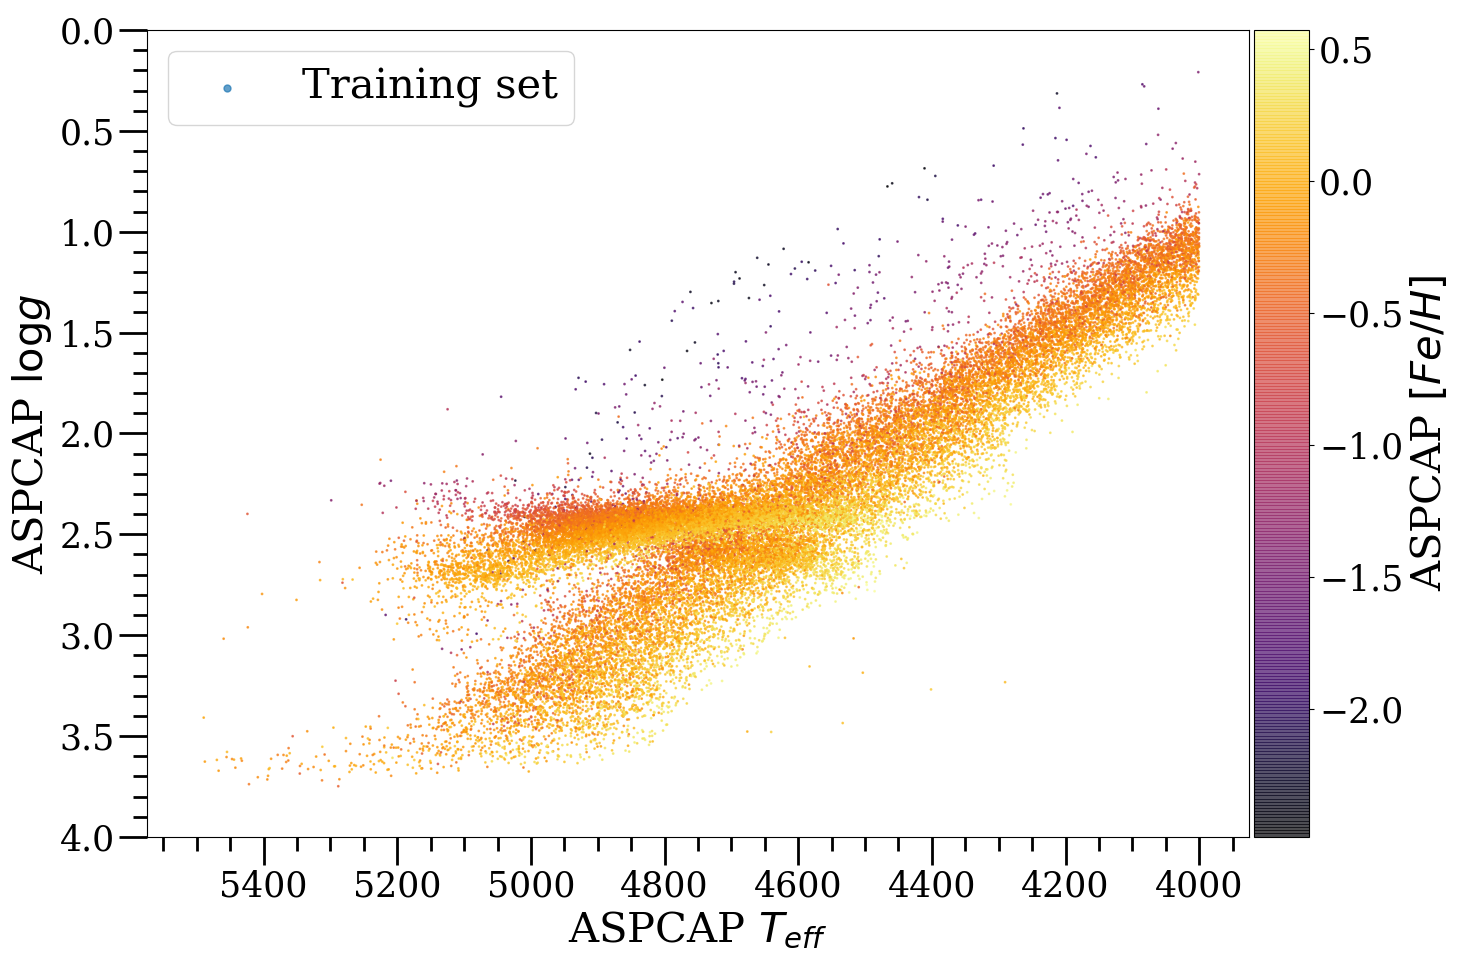

In [3]:
from astroNN.datasets import H5Loader
import pylab as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

loader = H5Loader('__train')
loader.load_err = False
loader.load_combined = True  # load combined spectra
TEFF = loader.load_entry('teff')
LOGG = loader.load_entry('logg')
FE = loader.load_entry('Fe')

print(np.sum([LOGG==-9999]), " of the log(g) are -9999.")

fig = plt.figure(figsize=(15,10), dpi=100)
ax = plt.gca()
plt.scatter(TEFF, LOGG, s=1, c=FE, label=f'Training set', alpha=0.7, cmap='inferno')
plt.xlabel('ASPCAP ' +"$T_{eff}$", fontsize=30)
plt.ylabel('ASPCAP '+'$\log{g}$', fontsize=30)
plt.ylim((0., 4.))
plt.legend(loc='best', fontsize=30, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
#colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label("ASPCAP "+"$[Fe/H]$", size=30)
            
plt.tight_layout()
plt.savefig('logg_teff_fe.png')
plt.show()

dr is not provided, using default dr=14
dr is not provided, using default dr=14


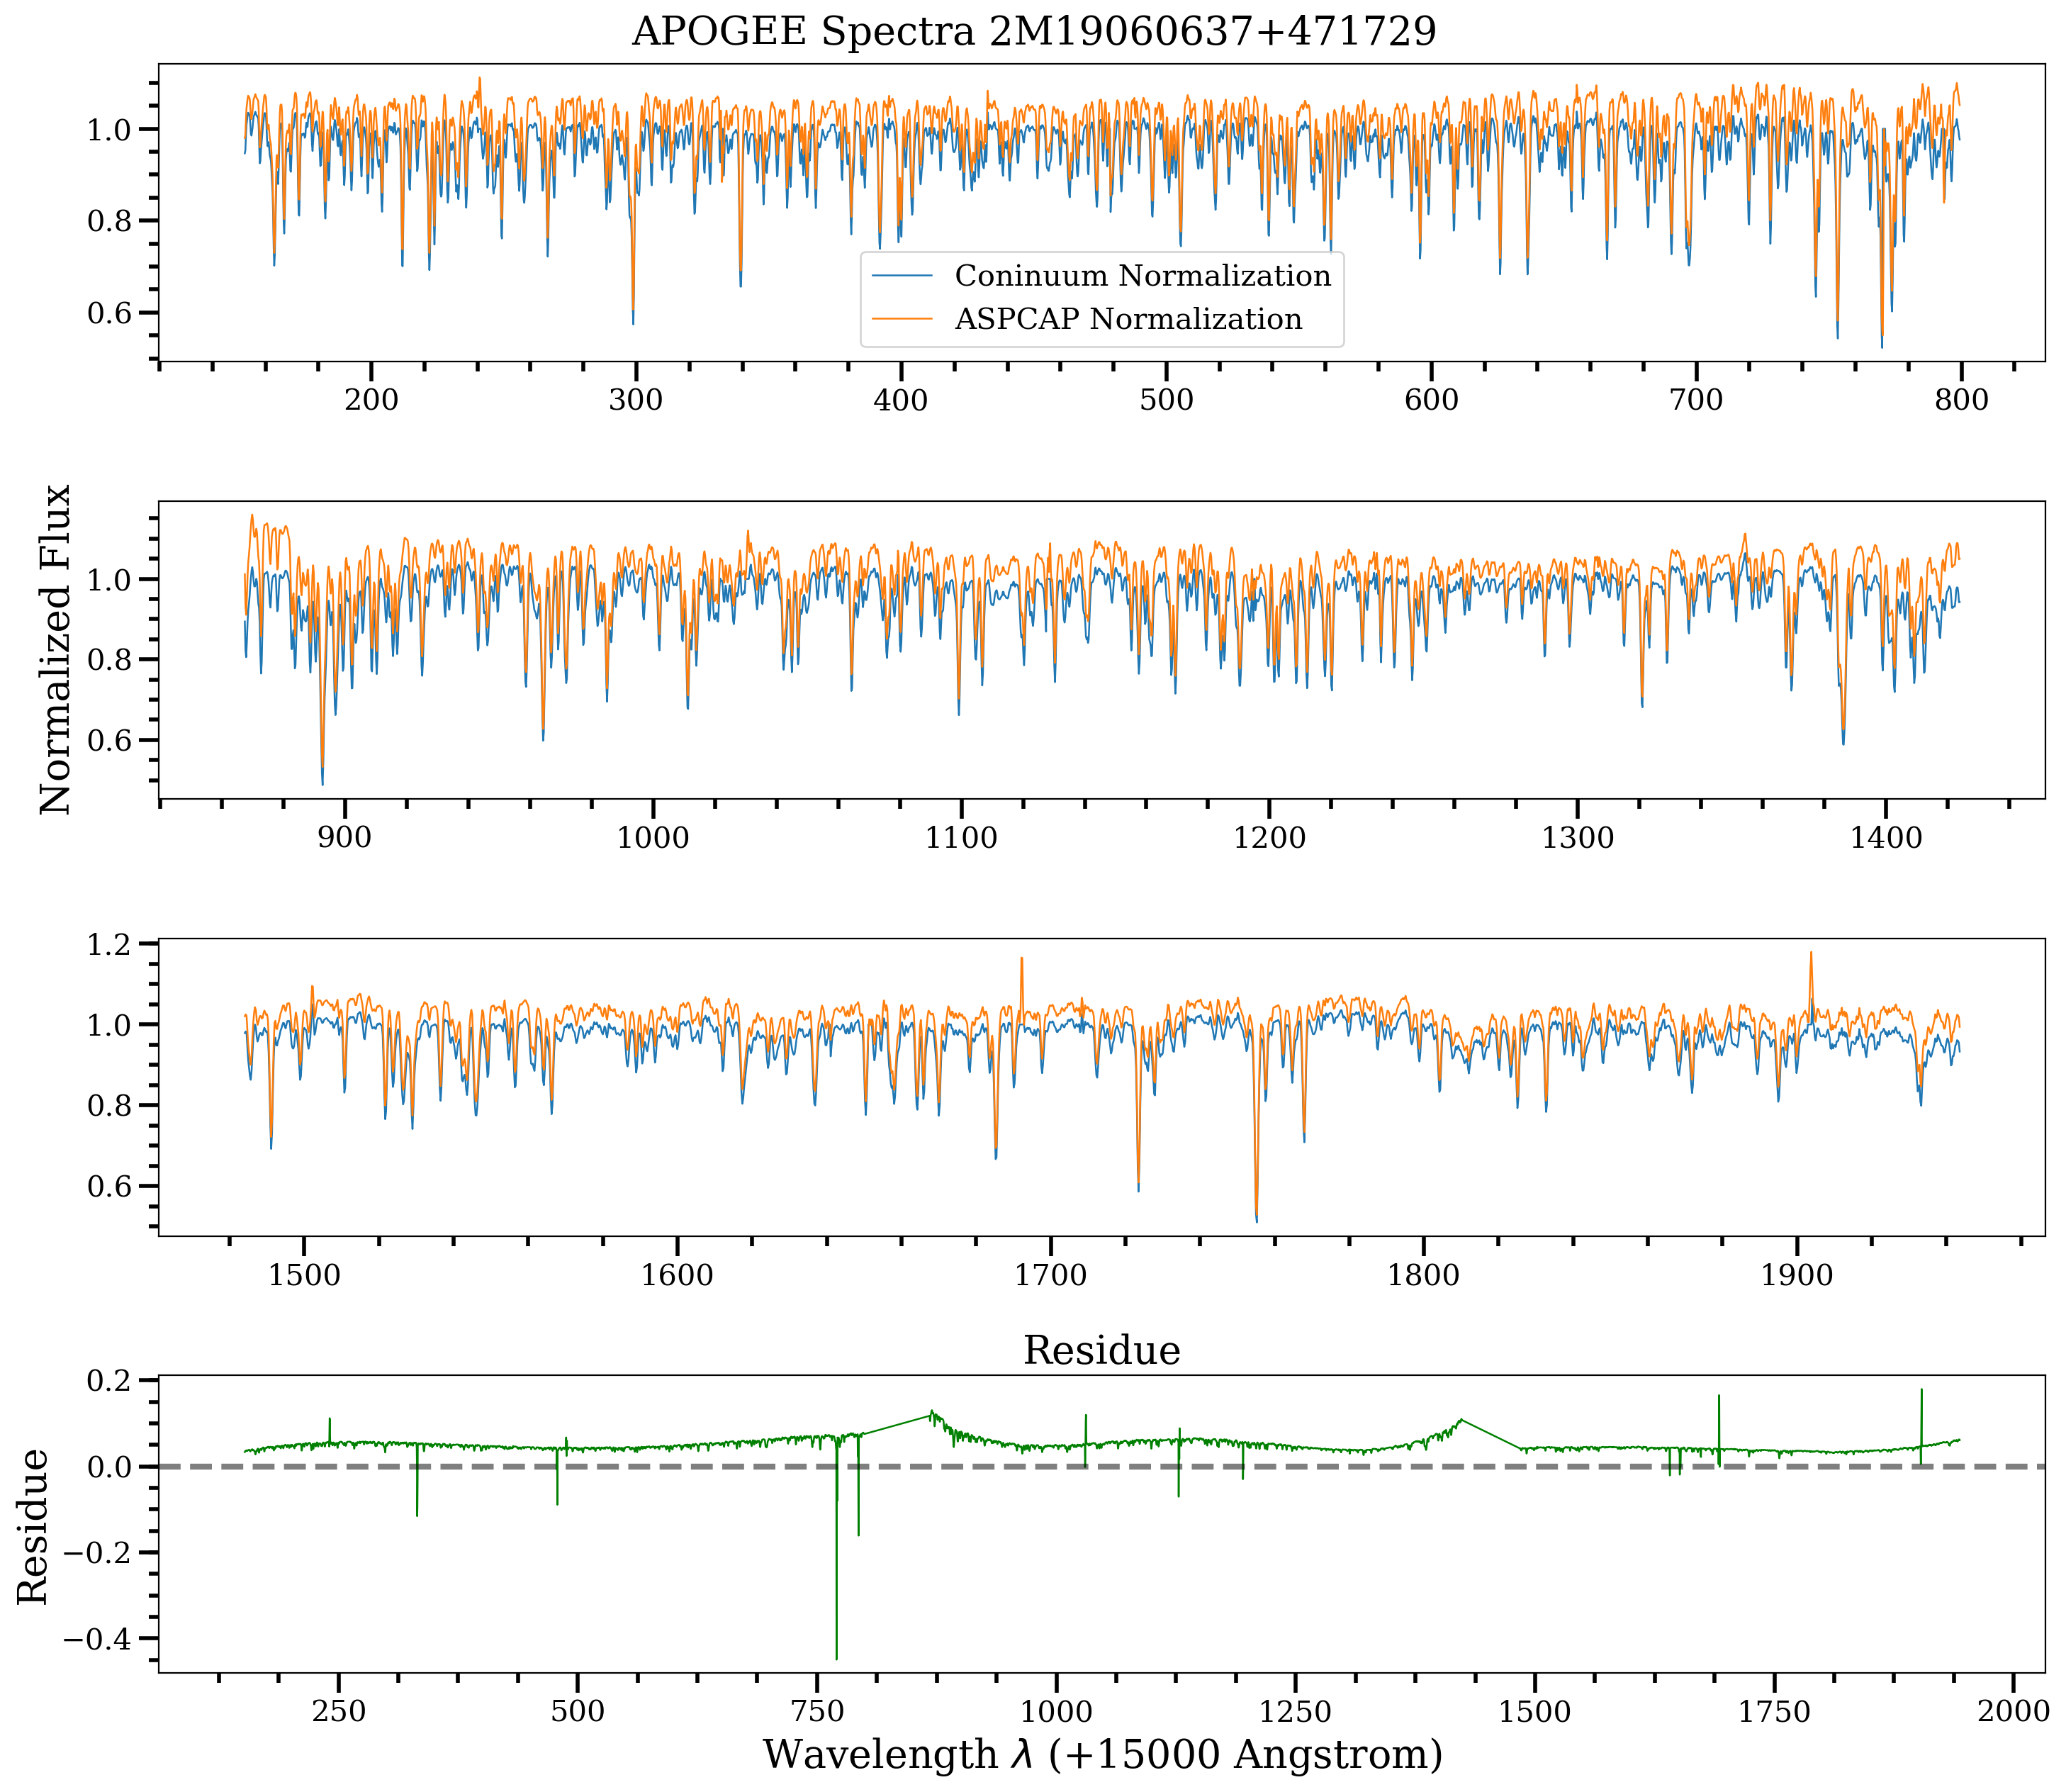

In [20]:
from astroNN.apogee import visit_spectra, combined_spectra, gap_delete, apogee_continuum, bitmask_boolean
import matplotlib.ticker as ticker
from astroNN.apogee.chips import wavelength_solution, chips_split
from astropy.io import fits 
import numpy as np
import pylab as plt

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

target_bit = [0, 1, 2, 3, 4, 5, 6, 7, 12]
apstar_file = fits.open(visit_spectra(dr=14, location=4405, apogee="2M19060637+4717296", verbose=0))

# read the raw spectra from apstar
_spec = np.vstack((apstar_file[1].data, apstar_file[1].data))
_spec_err = np.vstack((apstar_file[2].data, apstar_file[2].data))
_spec_mask = np.vstack((apstar_file[3].data, apstar_file[3].data))

# delete gaps, normalize spectra and set target_bits in bitmask to 0
_spec = gap_delete(_spec, dr=14)
_spec_err = gap_delete(_spec_err, dr=14)
_spec_mask = gap_delete(_spec_mask, dr=14)
_normspec, _spec_err = apogee_continuum(_spec, _spec_err, bitmask=_spec_mask, target_bit=target_bit)

spec = gap_delete(fits.getdata(combined_spectra(dr=14, location=4405, apogee="2M19060637+4717296", verbose=0)))

lambda_blue, lambda_green, lambda_red = wavelength_solution(dr=14)

lambda_blue -= 15000
lambda_green -= 15000
lambda_red -= 15000

fig = plt.figure(figsize=(15, 13), dpi=200)
blue, green, red = chips_split(_normspec[0], dr=14)
blue, green, red = blue[0], green[0], red[0]

aspcap_blue, aspcap_green, aspcap_red = chips_split(spec[0], dr=14)
aspcap_blue, aspcap_green, aspcap_red = aspcap_blue[0], aspcap_green[0], aspcap_red[0]

fig.suptitle('APOGEE Spectra 2M19060637+471729', fontsize=20)
ax1 = fig.add_subplot(411)
ax1.plot(lambda_blue, blue, linewidth=0.9, label='Coninuum Normalization')
ax1.plot(lambda_blue, aspcap_blue, linewidth=0.9, label='ASPCAP Normalization')
ax2 = fig.add_subplot(412)
ax2.set_ylabel('Normalized Flux', fontsize=20)
ax2.plot(lambda_green, green, linewidth=0.9, label='astroNN')
ax2.plot(lambda_green, aspcap_green, linewidth=0.9, label='ASPCAP')
ax3 = fig.add_subplot(413)
ax3.plot(lambda_red, red, linewidth=0.9, label='astroNN')
ax3.plot(lambda_red, aspcap_red, linewidth=0.9, label='ASPCAP')
ax4 = fig.add_subplot(414)
ax4.plot(np.concatenate((lambda_blue, lambda_green, lambda_red)), 
         np.concatenate((aspcap_blue-blue, aspcap_green-green, aspcap_red-red)), linewidth=0.9, c='green')
ax4.set_xlabel(r'Wavelength $\lambda$ (+15000 Angstrom)', fontsize=20)
ax4.set_ylabel('Residue', fontsize=20)
ax4.set_title('Residue', fontsize=20)
ax4.axhline(0, ls='--', c='k', lw=3., alpha=0.5)

ax1.tick_params(labelsize=15, width=2, length=10, which='major')
ax1.tick_params(width=2, length=5, which='minor')
ax2.tick_params(labelsize=15, width=2, length=10, which='major')
ax2.tick_params(width=2, length=5, which='minor')
ax3.tick_params(labelsize=15, width=2, length=10, which='major')
ax3.tick_params(width=2, length=5, which='minor')
ax4.tick_params(labelsize=15, width=2, length=10, which='major')
ax4.tick_params(width=2, length=5, which='minor')
ax1.legend(loc='best', fontsize=15)

tick_spacing = 150
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.5))
# ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing / 1.7))
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()
plt.tight_layout(rect=[0, 0.00, 1, 0.98])
plt.savefig('normalization_aspcap.png')